<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/08_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Искусственные нейронные сети

## Полносвязная сеть прямого распространения

### Данные и предобработка

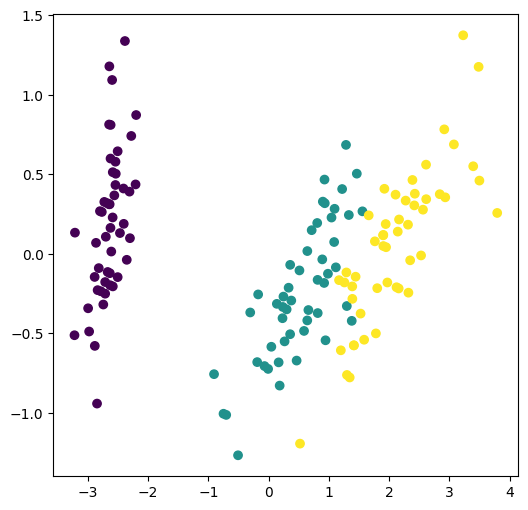

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

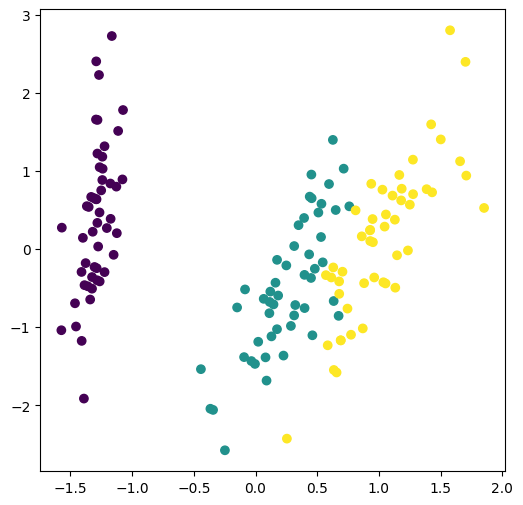

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.show()

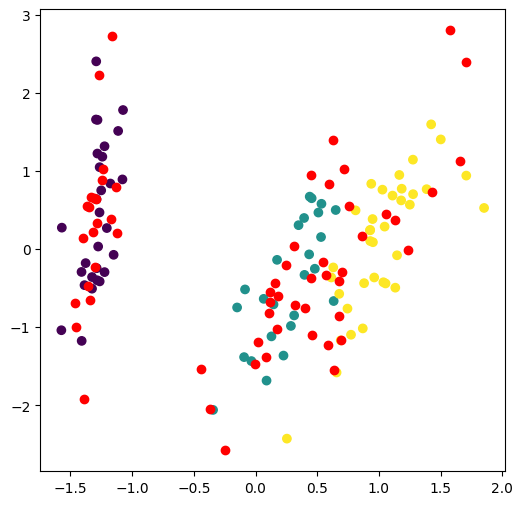

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4)


plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
plt.show()

###  Векторизация массива правильных ответов

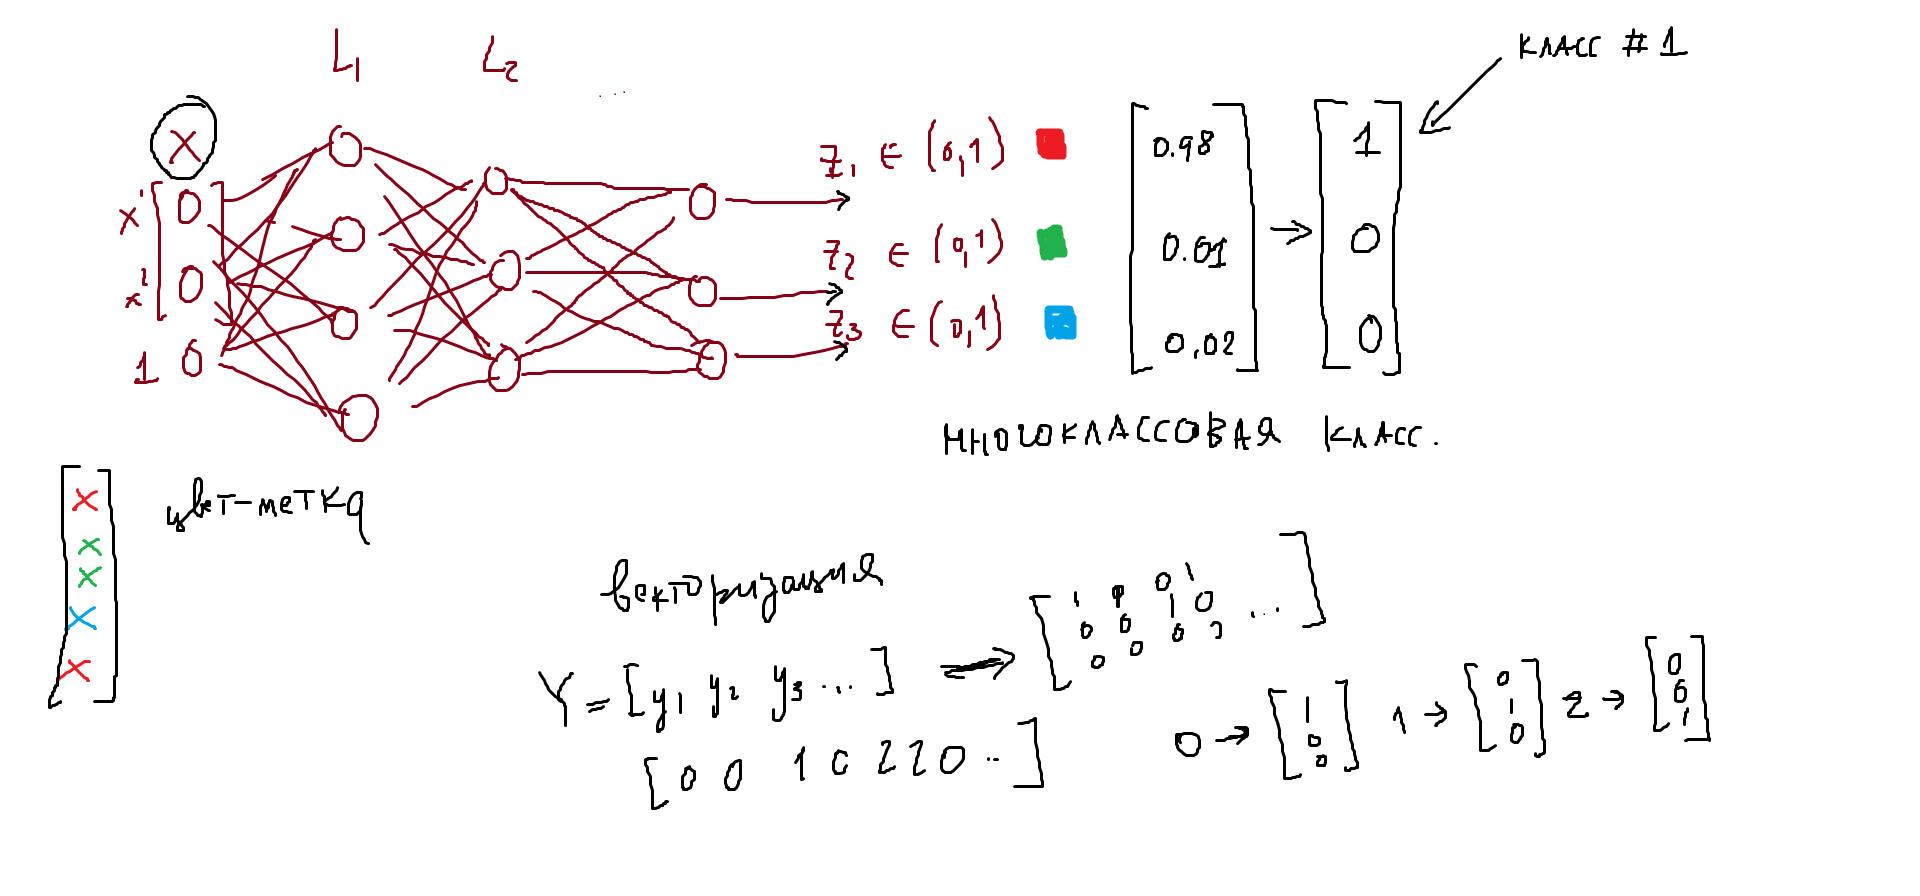

In [ ]:
print(y_test)

def convert_y_to_vect(y, num_class=2):
    y_vect = np.zeros((len(y), num_class))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return np.array(y_vect)

y_train_vect = convert_y_to_vect(y_train, 3)
y_test_vect = convert_y_to_vect(y_test, 3)
print(y_test_vect)

[1 2 0 1 1 0 1 2 2 1 0 1 1 2 0 0 1 2 2 1 2 1 1 2 2 0 1 0 2 1 0 0 1 2 0 0 2
 1 0 0 0 1 1 1 1 0 0 0 1 1 0 2 1 0 1 0 0 2 1 1]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Полносвязная сеть

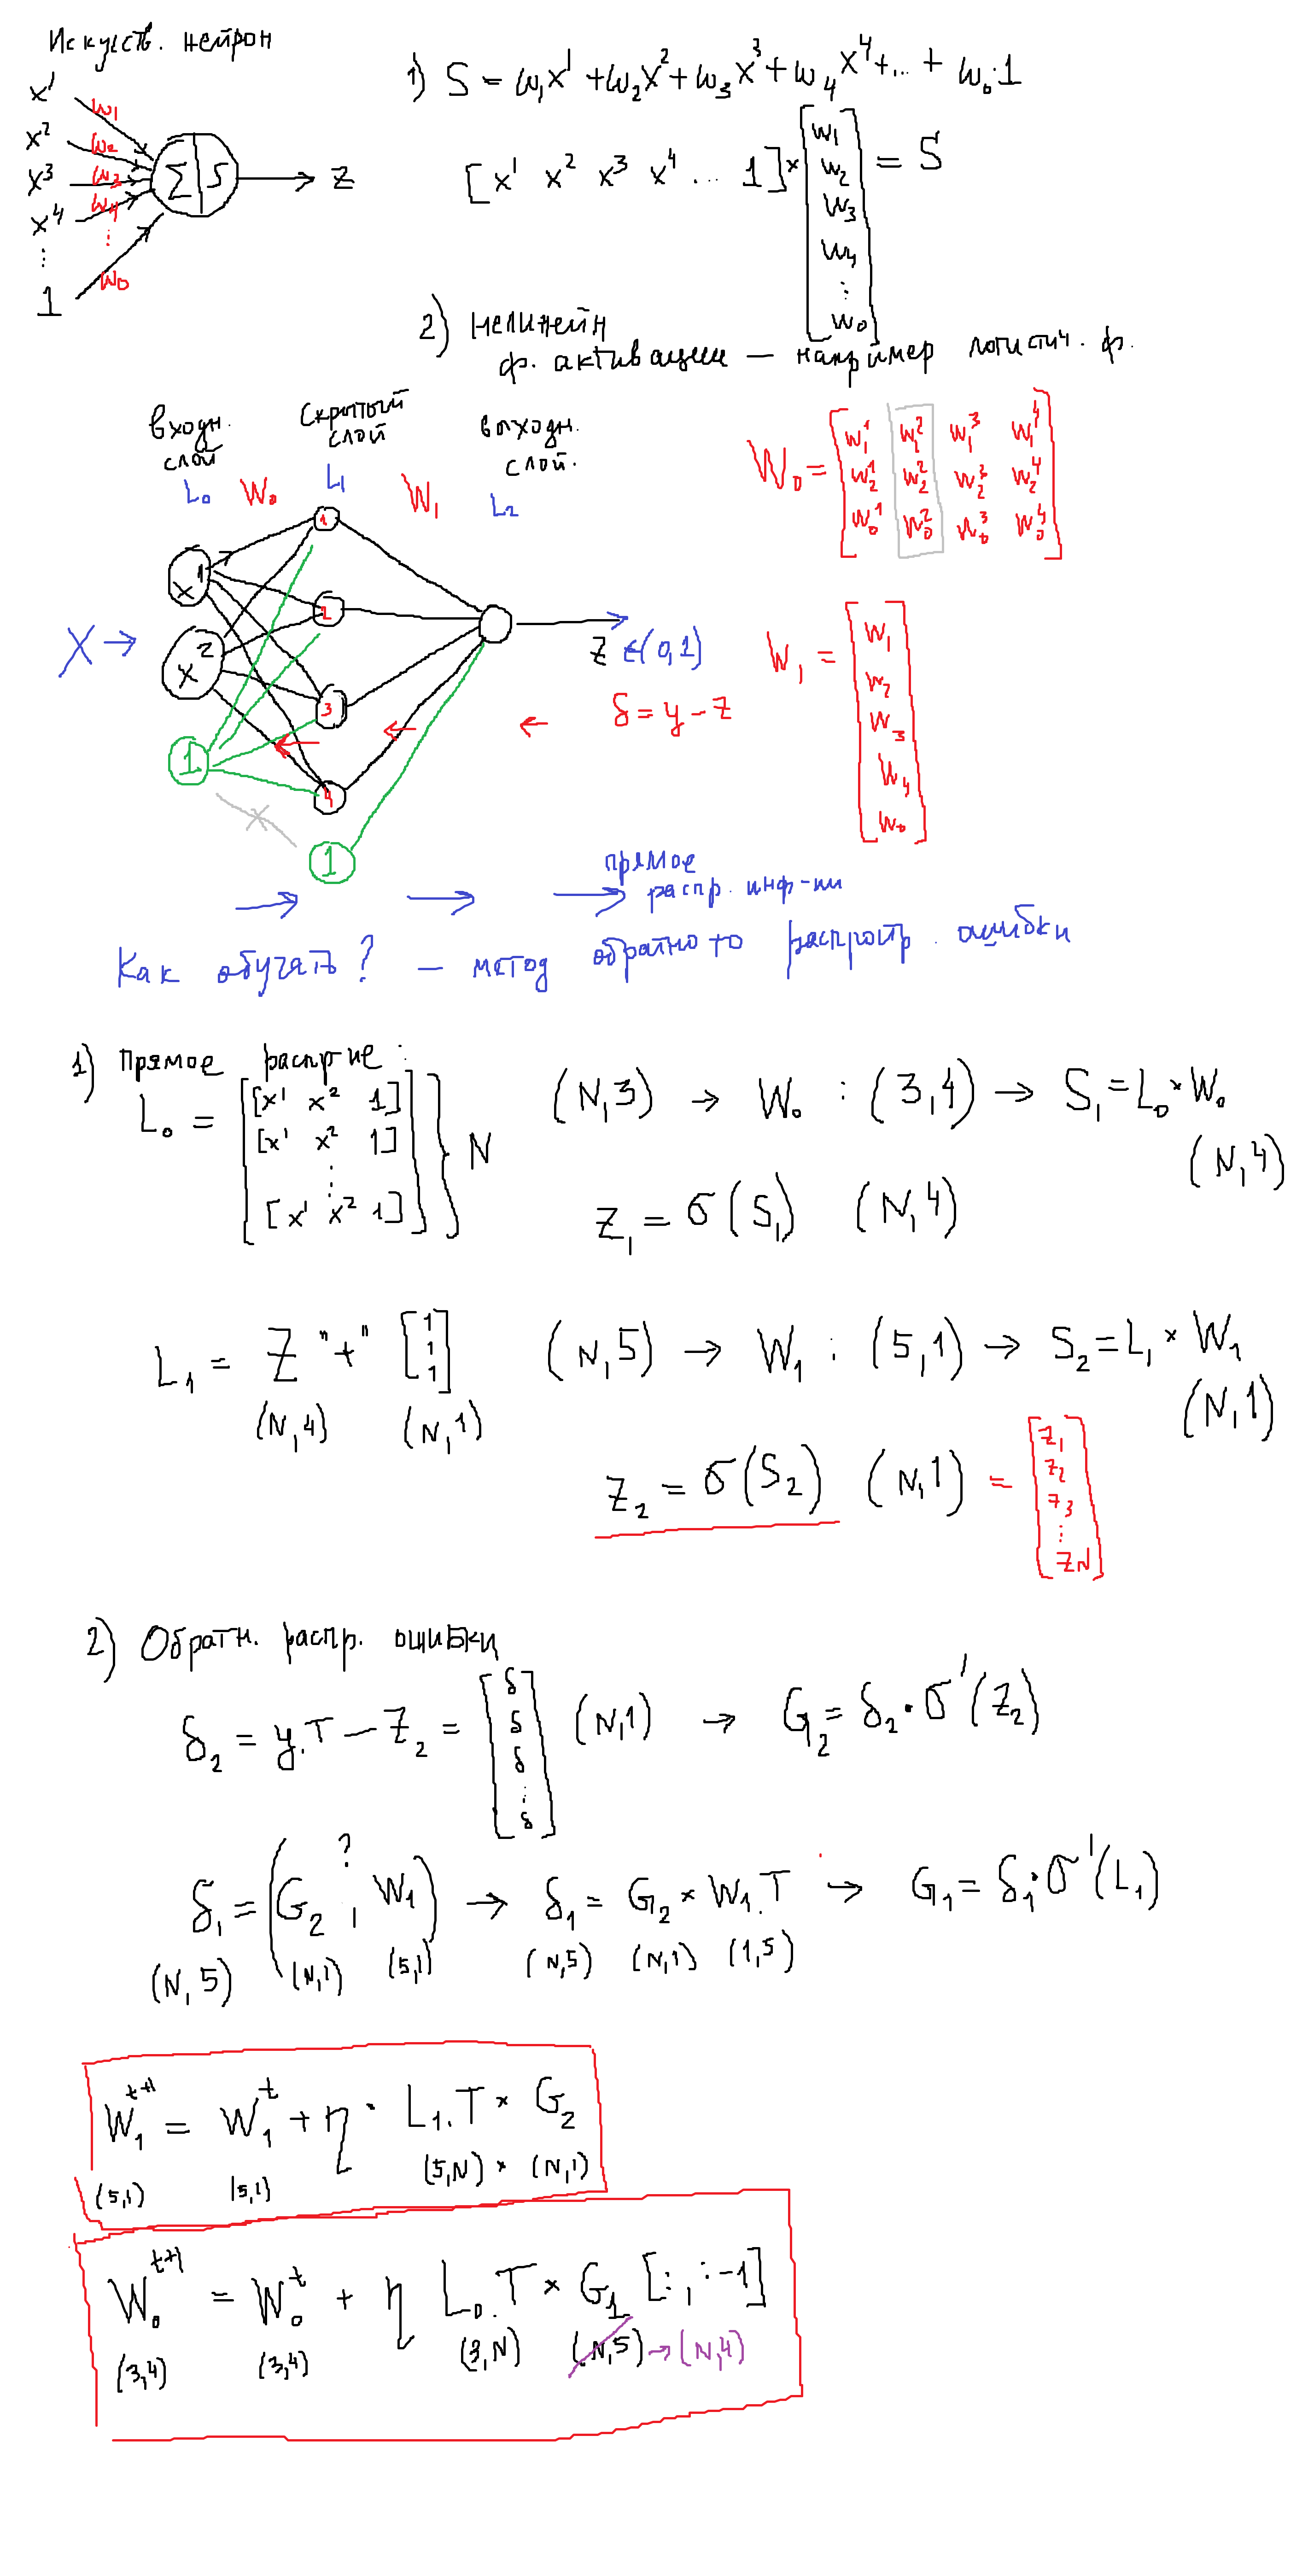

#### Функция активации

In [ ]:
def sigmoid(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

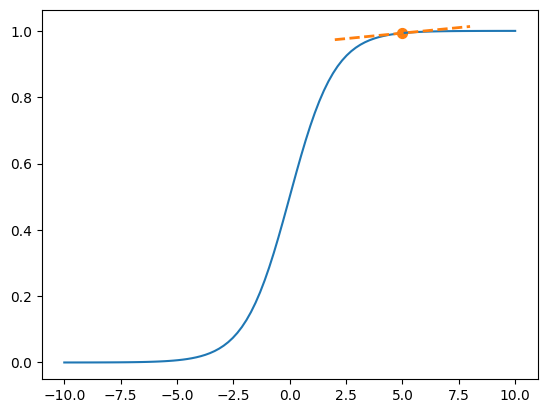

In [ ]:
x = np.linspace(-10,10,100)

x1 = 5
y1 = sigmoid(x1)

def line(x, x1, y1):
    return sigmoid(sigmoid(x1),True)*(x - x1) + y1

xrange = np.linspace(x1-3, x1+3, 10)

plt.figure()
plt.plot(x, sigmoid(x))
plt.scatter(x1, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)

####  Обучение сети

In [ ]:
eta = 50
epochs = 10000

input = X_train.shape[1]
hidden = 4
output = y_train_vect.shape[1]

W0 = np.random.rand(input+1,hidden)
W1 = np.random.rand(hidden+1,output)

for epoch in range(epochs):
    # прямое распространение информации
    L0 = np.append(X_train, np.array([[1] for i in range(len(X_train))]), axis=1)
    L1 = sigmoid(np.dot(L0,W0))
    L1 = np.append(L1, np.array([[1] for i in range(len(L1))]), axis=1)
    Z = sigmoid(np.dot(L1,W1))
    # обратное распространение ошибки
    delta2 = y_train_vect - Z
    G2 = delta2*sigmoid(Z,True)
    delta1 = np.dot(G2,W1.T)
    G1 = delta1*sigmoid(L1,True)
    # обновление весов
    W1 += eta*np.dot(L1.T,G2)/len(X_train)
    W0 += eta*np.dot(L0.T,G1[:,:-1])/len(X_train)

#### Предсказание модели

[1 2 0 2 1 0 1 2 2 1 0 1 1 2 0 0 1 2 2 1 2 1 1 2 2 0 1 0 2 1 0 0 1 2 0 0 2
 1 0 0 0 1 1 1 1 0 0 0 1 1 0 2 1 0 1 0 0 2 1 1]


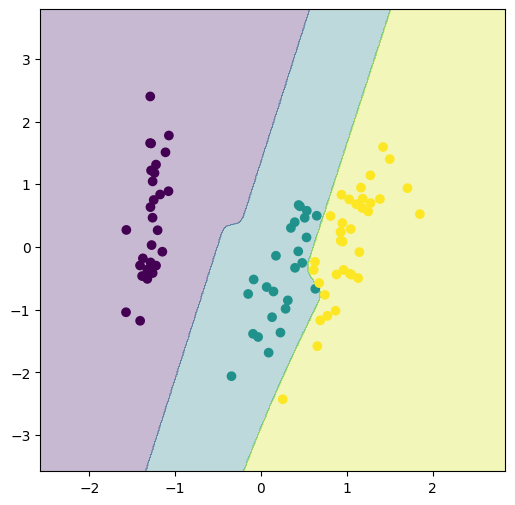

Artificial Neural Network:  0.9833333333333333


In [ ]:
def predict(X_):
    #X_ = X_scale.transform(X)
    L0 = np.append(X_, np.array([[1] for i in range(len(X_))]), axis=1)
    L1 = sigmoid(np.dot(L0,W0))
    L1 = np.append(L1, np.array([[1] for i in range(len(L1))]), axis=1)
    Z = sigmoid(np.dot(L1,W1))
    return np.argmax(Z, axis=1)

print(predict(X_test))

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print ('Artificial Neural Network: ',
       accuracy_score(predict(X_test), y_test))

# Домашнее задание

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Сравнить результат с классификацией датасета digits, предобработанного и не предобработанного алгоритмом t-SNE.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def sigmoid(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

class Model:
  def __init__(self, in_shape: int, num_class: int):
    self.input = in_shape
    self.hidden = 16
    self.output = num_class

    self.W0 = np.random.rand(self.input+1, self.hidden)
    self.W1 = np.random.rand(self.hidden+1, self.output)

  def convert_one_hot(self, y):
      y_vect = np.zeros((len(y), self.output))
      for i in range(len(y)):
          y_vect[i, y[i]] = 1
      return np.array(y_vect)

  def train(self, X_train, y_train, epochs=10000, eta=50):
    for epoch in tqdm(range(epochs)):
      # прямое распространение информации
      L0 = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
      L1 = sigmoid(np.dot(L0, self.W0))
      L1 = np.append(L1, np.ones((len(L1), 1)), axis=1)
      Z = sigmoid(np.dot(L1, self.W1))
      # обратное распространение ошибки
      delta2 = y_train - Z
      G2 = delta2 * sigmoid(Z, True)
      delta1 = np.dot(G2, self.W1.T)
      G1 = delta1 * sigmoid(L1, True)
      # обновление весов
      self.W1 += eta * np.dot(L1.T, G2) / len(X_train)
      self.W0 += eta * np.dot(L0.T, G1[:, :-1]) / len(X_train)

  def predict(self, X_):
      L0 = np.append(X_, np.ones((len(X_), 1)), axis=1)
      L1 = sigmoid(np.dot(L0, self.W0))
      L1 = np.append(L1, np.ones((len(L1), 1)), axis=1)
      Z = sigmoid(np.dot(L1, self.W1))

      return np.argmax(Z, axis=1)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

num_class = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = Model(X_train.shape[1], num_class)

y_train_vect = model.convert_one_hot(y_train)
y_test_vect = model.convert_one_hot(y_test)

In [ ]:
model.train(X_train, y_train_vect)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
predicted_classes = model.predict(X_test)
print("Изначально: ")
print(y_test)
print("Предсказанные классы: ")
print(predicted_classes)

Изначально: 
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5]
Предсказанные классы: 
[4 5 3 7 2 1 5 2 5 2 1 7 4 2 4 2 3 7 3 4 4 3 4 7 5 2 3 5 4 3 4 3 1 4 4 5 3
 4 7 4 4 3 1 3 4 1 3 4 4 5 5 1 3 5 5 2 3 2 2 1 2 4 5 2 4 5 7 5 7 5 3 5 5 4
 7 4 4 5 5 2 5 4 2 3 4 2 4 4 4 3 1 2 1 3 5 2 3 4 4 4 4 3 5 3 1 3 5 1 4 2 7
 7 4 4 1 3 2 7 4 7 2 4 5 4 2 7 2 7 5 3 7 5 7 5 4 4 4 4 2 4 2 3 4 4 4 4 4 1
 2 5 5 5 4 5 4 4 2 5 3 1 7 2 2 4 4 5 3 4 5 7 5 2 4 2 1 3 7 7 2 2 3 5 4 4 3
 2 2 5 4 3 3 4 1 2 4 2 3 1 4 4 5 5 5 7 2

<ipython-input-11-dd36370c4e06>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Artificial Neural Network:  0.48518518518518516


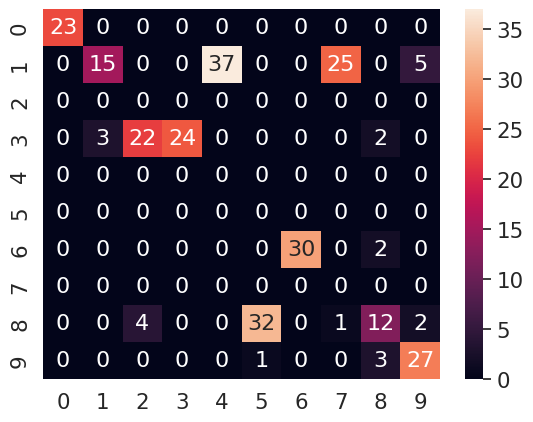

In [ ]:
###################### код для вычисления достоверности классификатора
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print ('Artificial Neural Network: ',
       accuracy_score(model.predict(X_test), y_test))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
from sklearn.manifold import TSNE

digits = load_digits()
X, y = digits.data, digits.target

scaler = StandardScaler()
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

X = scaler.fit_transform(X)
X = tsne.fit_transform(X)

num_class = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = Model(X_train.shape[1], num_class)

y_train_vect = model.convert_one_hot(y_train)
y_test_vect = model.convert_one_hot(y_test)

In [ ]:
model.train(X_train, y_train_vect)

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-11-dd36370c4e06>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<ipython-input-11-dd36370c4e06>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Artificial Neural Network:  0.48518518518518516


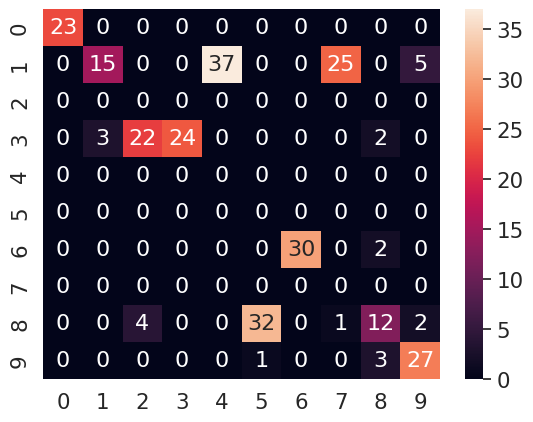

In [103]:
y_pred = model.predict(X_test)
print('Artificial Neural Network: ',
       accuracy_score(y_pred, y_test))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Pytorch

(1797, 64)
[ 0.  0.  4.  9. 12. 16.  8.  0.  0.  0. 15. 15.  8.  8.  2.  0.  0.  4.
 16. 11.  4.  1.  0.  0.  0.  8. 16. 16. 16. 14.  0.  0.  0.  0. 11.  9.
  8. 16.  0.  0.  0.  0.  0.  0.  7. 16.  0.  0.  0.  0.  0.  8. 16. 12.
  0.  0.  0.  0.  3. 13.  9.  1.  0.  0.]


<Figure size 640x480 with 0 Axes>

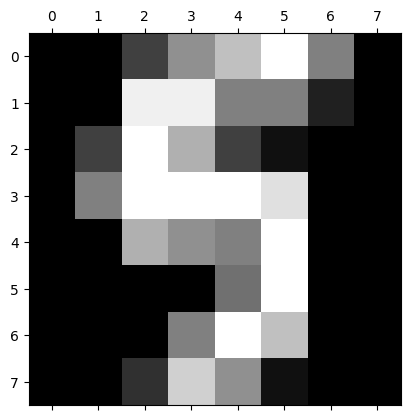

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

print(X[1700])

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1700])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[1700]

array([ 0.        , -0.33501649, -0.25345218, -0.66762355,  0.03544399,
        1.80378259,  1.99639989, -0.12502292, -0.05907756, -0.62400926,
        0.8519818 ,  0.75962245, -0.4767178 , -0.02905976,  0.04283835,
       -0.13043338, -0.04462507,  0.39113906,  1.07165259,  0.69077777,
       -0.5017713 , -1.09857754, -0.54880546, -0.11422184, -0.03337973,
        1.7580838 ,  1.11605583,  1.22058589,  0.98740215,  1.09838387,
       -0.62889588, -0.04723238,  0.        , -0.67237227,  0.52709397,
       -0.0114553 , -0.38801016,  1.23632049, -0.82269451,  0.        ,
       -0.06134367, -0.5312841 , -1.05283456, -1.12245711, -0.1074235 ,
        1.36346581, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
       -1.33033057, -0.29456207,  1.24208282,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135, -0.5013322 ,  0.20829258,
       -0.56950512, -0.97712664, -0.5056698 , -0.19600752])

In [ ]:
from sklearn.model_selection import train_test_split
y = digits.target
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
print(len(y_test))

1797
719


In [ ]:
import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10), dtype='float')
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
print(y_train[25])
print(y_v_train[25])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# гиперпараметры :
batch_size = 64 # размер батча
learning_rate = 1e-3 # параметр скорости обучения
epochs = 1000 # эпохи обучения

In [ ]:
# преобразуем данные в тензоры, с которыми работает PyTorch:
X_train_tensor = torch.tensor(X_train.astype(np.float32))
X_test_tensor = torch.tensor(X_test.astype(np.float32))

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#### векторизованные таргеты для MSELoss
y_v_train_tensor = torch.tensor(y_v_train, dtype=torch.float)
y_v_test_tensor = torch.tensor(y_v_test, dtype=torch.float)

In [ ]:
# DataLoader — итератор, который будет последовательно возвращать наши пары <X, y> батчами по 64 картинки:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

#### векторизованные таргеты для MSELoss
train_v_dataset = TensorDataset(X_train_tensor, y_v_train_tensor)
train_v_loader = DataLoader(train_v_dataset, batch_size=batch_size)

test_v_dataset = TensorDataset(X_test_tensor, y_v_test_tensor)
test_v_loader = DataLoader(test_v_dataset, batch_size=batch_size)

## Полносвязная искусственная нейронная сеть

### Функция ошиби - cross entropy

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(8*8, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

ann = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ann.parameters(), lr=learning_rate, momentum=0.9)

[999] test loss: 20.744271159172058, accuracy: 0.8957


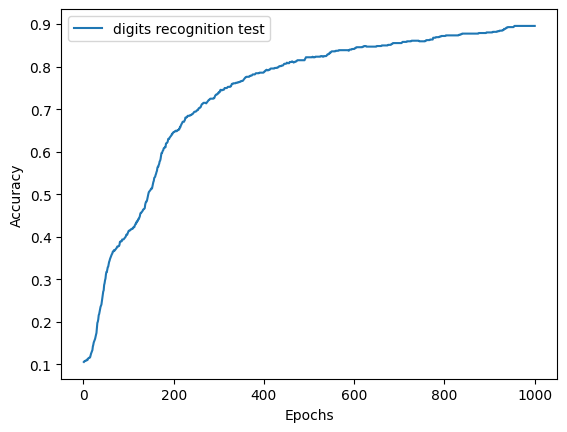

In [ ]:
accuracy_test = []

# обучение:
for epoch in range(epochs):
    ann.train() # есть два режима: обучение и тест
    train_samples_count = 0
    true_train_samples_count = 0
    running_loss = 0

    for batch in train_loader:
        x_data = batch[0]
        y_data = batch[1]
        optimizer.zero_grad()
        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        true_classified = (y_pred == y_data).sum().item()
        true_train_samples_count += true_classified
        train_samples_count += len(x_data)

    train_accuracy = true_train_samples_count / train_samples_count

    # тест
    ann.eval() # есть два режима: обучение и тест
    test_samples_count = 0
    true_test_samples_count = 0
    running_loss = 0

    for batch in test_loader:
        x_data = batch[0]
        y_data = batch[1]
        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)

        loss.backward()

        running_loss += loss.item()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        true_classified = (y_pred == y_data).sum().item()
        true_test_samples_count += true_classified
        test_samples_count += len(x_data)

    test_accuracy = true_test_samples_count / test_samples_count
    accuracy_test.append(test_accuracy)

print(f"[{epoch}] test loss: {running_loss}, accuracy: {round(test_accuracy, 4)}")

from matplotlib import pyplot as plt
plt.plot(list(range(1, epochs+1)), accuracy_test, label = "digits recognition test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Функция ошиби - MSE

#### неправильное использование

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(8*8, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

ann = ANN()
criterion = nn.MSELoss()
optimizer = optim.SGD(ann.parameters(), lr=learning_rate, momentum=0.9)

[999] test loss: 19.342164397239685, accuracy: 0.9458


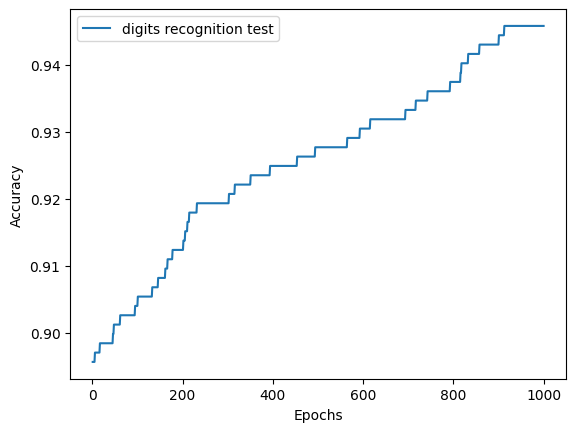

In [ ]:
accuracy_test = []

# обучение:
for epoch in range(epochs):
    ann.train() # есть два режима: обучение и тест
    train_samples_count = 0
    true_train_samples_count = 0
    running_loss = 0

    for batch in train_v_loader:
        x_data = batch[0]
        y_data = batch[1]
        optimizer.zero_grad()
        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        y_data = y_data.argmax(dim=1, keepdim=False) # для MSELoss
        true_classified = (y_pred == y_data).sum().item()
        true_train_samples_count += true_classified
        train_samples_count += len(x_data)

    train_accuracy = true_train_samples_count / train_samples_count
    #print(f"[{epoch}] train loss: {running_loss}, accuracy: {round(train_accuracy, 4)}") # выводим логи

    # тест
    ann.eval() # есть два режима: обучение и тест
    test_samples_count = 0
    true_test_samples_count = 0
    running_loss = 0

    for batch in test_v_loader:
        x_data = batch[0]
        y_data = batch[1]
        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)

        loss.backward()

        running_loss += loss.item()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        y_data = y_data.argmax(dim=1, keepdim=False) # для MSELoss
        true_classified = (y_pred == y_data).sum().item()
        true_test_samples_count += true_classified
        test_samples_count += len(x_data)

    test_accuracy = true_test_samples_count / test_samples_count
    accuracy_test.append(test_accuracy)

print(f"[{epoch}] test loss: {running_loss}, accuracy: {round(test_accuracy, 4)}")

from matplotlib import pyplot as plt
plt.plot(list(range(1, epochs+1)), accuracy_test, label = "digits recognition test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### правильное использование

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(8*8, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

ann = ANN()#.cuda()
criterion = nn.MSELoss(reduction='none')  # отличие
optimizer = optim.SGD(ann.parameters(), lr=learning_rate, momentum=0.9)

[999] test loss: 0, accuracy: 0.9764


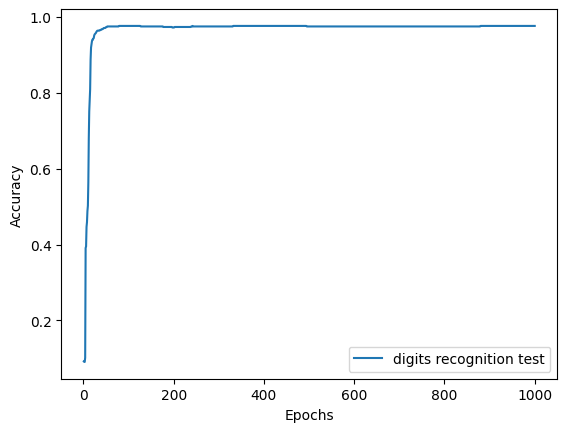

In [ ]:
accuracy_test = []

# обучение:
for epoch in range(epochs):
    ann.train() # есть два режима: обучение и тест
    train_samples_count = 0
    true_train_samples_count = 0
    running_loss = 0

    for batch in train_v_loader:
        x_data = batch[0]#.cuda()
        y_data = batch[1]#.cuda()
        optimizer.zero_grad()
        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)
        loss.backward(torch.ones_like(y_pred)) # отличие
        optimizer.step()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        y_data = y_data.argmax(dim=1, keepdim=False) # для MSELoss
        true_classified = (y_pred == y_data).sum().item()
        true_train_samples_count += true_classified
        train_samples_count += len(x_data)

    train_accuracy = true_train_samples_count / train_samples_count
    #print(f"[{epoch}] train loss: {running_loss}, accuracy: {round(train_accuracy, 4)}") # выводим логи

    # тест
    ann.eval() # есть два режима: обучение и тест
    test_samples_count = 0
    true_test_samples_count = 0
    running_loss = 0

    for batch in test_v_loader:
        x_data = batch[0]#.cuda()
        y_data = batch[1]#.cuda()

        y_pred = ann(x_data)
        loss = criterion(y_pred, y_data)

        loss.backward(torch.ones_like(y_pred))

        #running_loss += loss.item()

        y_pred = y_pred.argmax(dim=1, keepdim=False)
        y_data = y_data.argmax(dim=1, keepdim=False) # для MSELoss
        true_classified = (y_pred == y_data).sum().item()
        true_test_samples_count += true_classified
        test_samples_count += len(x_data)

    test_accuracy = true_test_samples_count / test_samples_count
    accuracy_test.append(test_accuracy)

print(f"[{epoch}] test loss: {running_loss}, accuracy: {round(test_accuracy, 4)}")

from matplotlib import pyplot as plt
plt.plot(list(range(1, epochs+1)), accuracy_test, label = "digits recognition test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Сверточная нейронная сеть

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data/15.
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

X_train = np.reshape(X_train, (-1, 1, 8, 8))
X_test = np.reshape(X_test, (-1, 1, 8, 8))

X_train.shape, X_test.shape

((1078, 1, 8, 8), (719, 1, 8, 8))

In [ ]:
torch_x_train = torch.from_numpy(X_train).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)

train = TensorDataset(torch_x_train,torch_y_train)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)

#### Пример простой сверточной нейронной сети для классификации набора данных digits

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class NCC(nn.Module):
    def __init__(self):
        super(NCC, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1,4*4*64 )
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

ncc = NCC()
ncc.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ncc.parameters(), lr=learning_rate, momentum=0.9)

ncc

cpu


NCC(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [38]:
%%time

torch.manual_seed(1234)

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = ncc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if epoch % 100 == 99:
        print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

NameError: ignored

In [ ]:
torch_x_test = torch.from_numpy(X_test).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)

torch_x_test, torch_y_test = torch_x_test.to(device), torch_y_test.to(device)

val = ncc(torch_x_test)

_, predicted = torch.max(val.data, 1)

print('Accuracy of the network %d %%' % (100 * torch.sum(torch_y_test==predicted) / len(y_test)))

Accuracy of the network 97 %


#### Пример более сложной сверточной нейронной, которая в случае набора данных digits избыточна

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class NCC(nn.Module):
    def __init__(self):
        super(NCC, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=10)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,4*4*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

ncc = NCC()
ncc.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ncc.parameters(), lr=learning_rate, momentum=0.9)

ncc

cpu


NCC(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(10, 10))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
%%time

#Seed
torch.manual_seed(1234)

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = ncc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

[10] loss: 2.313
[20] loss: 2.312
[30] loss: 2.316
[40] loss: 2.305
[50] loss: 2.306
[60] loss: 2.299
[70] loss: 2.302
[80] loss: 2.287
[90] loss: 2.287
[100] loss: 2.277
[110] loss: 2.257
[120] loss: 2.143
[130] loss: 1.877
[140] loss: 1.730
[150] loss: 1.567
[160] loss: 1.282
[170] loss: 1.365
[180] loss: 0.897
[190] loss: 1.172
[200] loss: 0.714
[210] loss: 0.744
[220] loss: 0.920
[230] loss: 0.748
[240] loss: 0.604
[250] loss: 0.480
[260] loss: 0.503
[270] loss: 0.434
[280] loss: 0.371
[290] loss: 0.478
[300] loss: 0.626
[310] loss: 0.432
[320] loss: 0.590
[330] loss: 0.409
[340] loss: 0.447
[350] loss: 0.285
[360] loss: 0.462
[370] loss: 0.290
[380] loss: 0.302
[390] loss: 0.311
[400] loss: 0.260
[410] loss: 0.308
[420] loss: 0.280
[430] loss: 0.318
[440] loss: 0.347
[450] loss: 0.339
[460] loss: 0.292
[470] loss: 0.383
[480] loss: 0.232
[490] loss: 0.212
[500] loss: 0.210
[510] loss: 0.282
[520] loss: 0.168
[530] loss: 0.204
[540] loss: 0.197
[550] loss: 0.240
[560] loss: 0.289
[

In [ ]:
#Validate trained model
torch_x_test = torch.from_numpy(X_test).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)

torch_x_test, torch_y_test = torch_x_test.to(device), torch_y_test.to(device)

val = ncc(torch_x_test)

_, predicted = torch.max(val.data, 1)

#Get accuration
print('Accuracy of the network %d %%' % (100 * torch.sum(torch_y_test==predicted) / len(y_test)))

Accuracy of the network 93 %


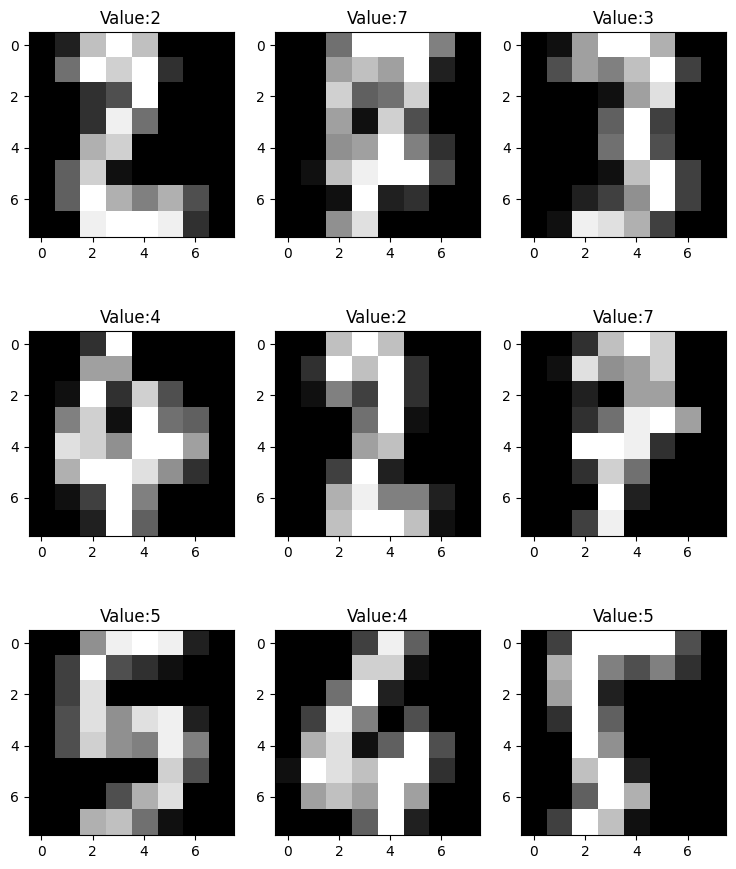

In [ ]:
def display(rows, columns, images, values=[], predictions=[]):
    fig = plt.figure(figsize=(9, 11))

    ax = []

    for i in range( columns*rows ):
        img = images[i]
        ax.append(fig.add_subplot(rows, columns, i+1))

        title = ""

        if(len(values) == 0):
            title = "Pred:" + str(predictions[i])
        elif(len(predictions) == 0):
            title = "Value:" + str(values[i])
        elif(len(values) != 0 and len(predictions) != 0):
            title = "Value:" + str(values[i]) + "\nPred:" + str(predictions[i])

        ax[-1].set_title(title)  # set title
        plt.imshow(img)

    plt.show()

idx = np.random.randint(1, 1000, size=9)

images = X_train[idx,:]
images = images[:,0]

values = y_train[idx]

display(rows=3, columns=3, images=images, values=values, predictions=[])

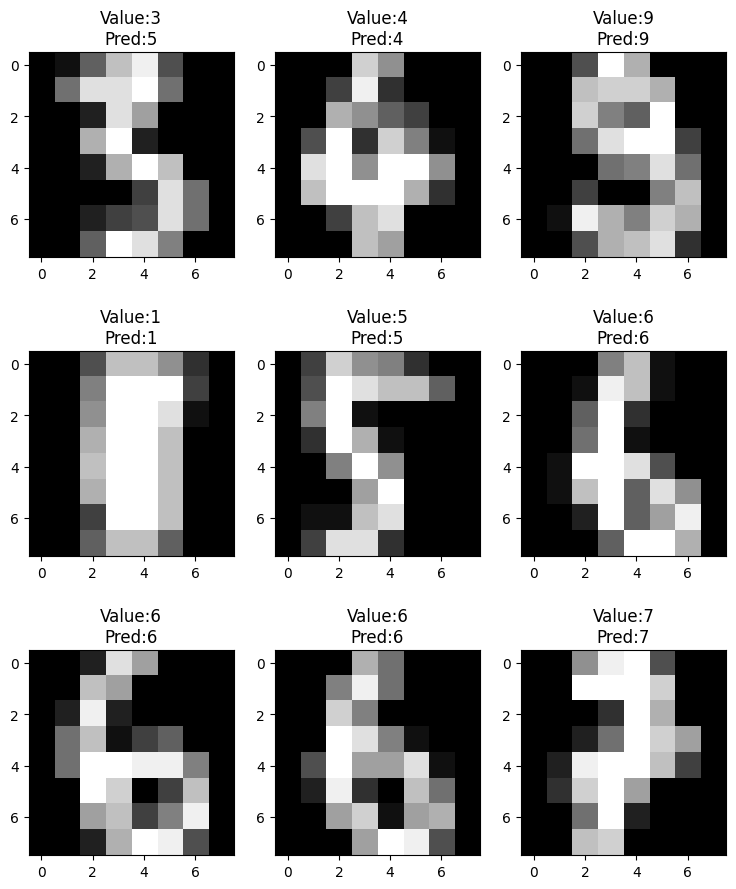

In [ ]:
idx = np.random.randint(1, len(X_test), size=9)

images = X_test[idx,:]
images = images[:,0]

values = y_test[idx]

predicted = predicted.cpu()

predictions = predicted.data.numpy()
predictions = predictions[idx]

display(rows=3, columns=3, images=images, values=values, predictions=predictions)

# Домашнее задание

3. Построить в Pytorch модель классификации набора данных MNIST с использованием сверточных нейронных сетей

In [83]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)])

train_data = datasets.MNIST(root='/content/mnist', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='/content/mnist', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

In [84]:
next(iter(train_loader))[0].shape

torch.Size([256, 1, 28, 28])

In [94]:
# гиперпараметры :
batch_size = 256 # размер батча
learning_rate = 1e-3 # параметр скорости обучения
epochs = 10 # эпохи обучения

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class NCC(nn.Module):
    def __init__(self):
        super(NCC, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(256*6*6, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)  # Применяем пулинг для уменьшения размерности
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

ncc = NCC()
ncc.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ncc.parameters(), lr=learning_rate, momentum=0.9)

In [97]:
%%time

torch.manual_seed(42)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ncc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
    print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

Epoch 1/10, Loss: 0.4009789228439331
[1] loss: 0.401
Epoch 2/10, Loss: 0.4273383319377899
[2] loss: 0.427
Epoch 3/10, Loss: 0.21552960574626923
[3] loss: 0.216
Epoch 4/10, Loss: 0.20513851940631866
[4] loss: 0.205
Epoch 5/10, Loss: 0.2270485758781433
[5] loss: 0.227
Epoch 6/10, Loss: 0.24185873568058014
[6] loss: 0.242
Epoch 7/10, Loss: 0.0983048751950264
[7] loss: 0.098
Epoch 8/10, Loss: 0.1606019288301468
[8] loss: 0.161
Epoch 9/10, Loss: 0.11745902895927429
[9] loss: 0.117
Epoch 10/10, Loss: 0.19313973188400269
[10] loss: 0.193
Finished Training
CPU times: user 21min 52s, sys: 3min 4s, total: 24min 57s
Wall time: 25min 27s


In [121]:
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        out = ncc(inputs)
        _, pred = torch.max(out.data, 1)
        y_pred += pred
        y_true += labels.tolist()

  0%|          | 0/40 [00:00<?, ?it/s]

Convolutional Neural Network:  0.9651


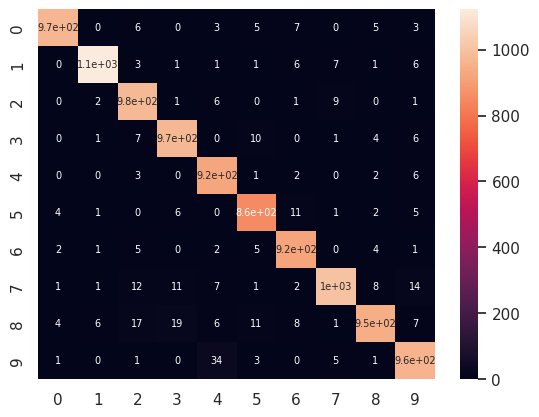

In [132]:
print('Convolutional Neural Network: ',
       accuracy_score(y_pred, y_true))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_true), range(10), range(10))

sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 7}) # font size

plt.show()